In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
dfa = pd.read_csv("Lab2 D1A.csv")
dfb = pd.read_csv("Lab2 D1B.csv")
dfc = pd.read_csv("Lab2 D1C.csv")

## Task 1:

In [8]:
display(dfa.columns)
display(dfb.columns)

Index(['fid', 'name', 'population', 'county', 'latitude'], dtype='object')

Index(['name', 'population', 'county', 'longitude', 'level', 'enrollment',
       'level.1'],
      dtype='object')

In [14]:
df = dfa.merge(dfb, on=list(set(dfa.columns) & set(dfb.columns)))
display(df.columns)
print('Dimensions:', df.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')

Dimensions: (27033, 9)


In [12]:
display(dfa.columns)
display(dfc.columns)

Index(['fid', 'name', 'population', 'county', 'latitude'], dtype='object')

Index(['county', 'city', 'score'], dtype='object')

In [16]:
df2 = dfa.merge(dfc, on=list(set(dfa.columns) & set(dfc.columns)))
display(df2.columns)
print('Dimensions:', df2.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')

Dimensions: (4221333, 7)


## Task 2:

In [49]:
n = 7
np.random.seed(42)

common = list(set(dfa.columns) & set(dfb.columns) & set(dfc.columns))
attr_size = ['small', 'medium', 'high']
attr_cardinal_direction = ['north', 'south', 'east', 'west']
attr_timings = ['full time', 'part time']
employment = ['employed', 'unemployed']

customized_data = pd.DataFrame({
    common[0]: np.random.choice(dfb[common[0]].unique() ,size=n),
    'sizes': np.random.choice(attr_size, size=n),
    'direction': np.random.choice(attr_cardinal_direction, size=n),
    'timings': np.random.choice(attr_timings, size=n),
    'employment': np.random.choice(employment, size=n),
    'salary': np.random.randint(30000, 15000000, size=n)
}
)

customized_data.head()

,county,sizes,direction,timings,employment,salary
0,RUTLAND,high,north,part time,employed,11949017
1,BALTIMORE CITY,high,south,part time,unemployed,13267723
2,TORRANCE,high,west,full time,employed,4751339
3,AUGUSTA,high,west,full time,employed,13261055
4,CHESTERFIELD,small,south,part time,employed,9919550


In [51]:
display(customized_data.shape)

(7, 6)

In [53]:
display(dfa.shape)
display(dfb.shape)
display(dfc.shape)

(26983, 5)

(26983, 7)

(26983, 3)

In [57]:
modifiedData = customized_data.merge(dfa, on=common).merge(dfb, on=common).merge(dfc, on=common)
display(modifiedData.shape)

(479527, 18)

## Task 3:

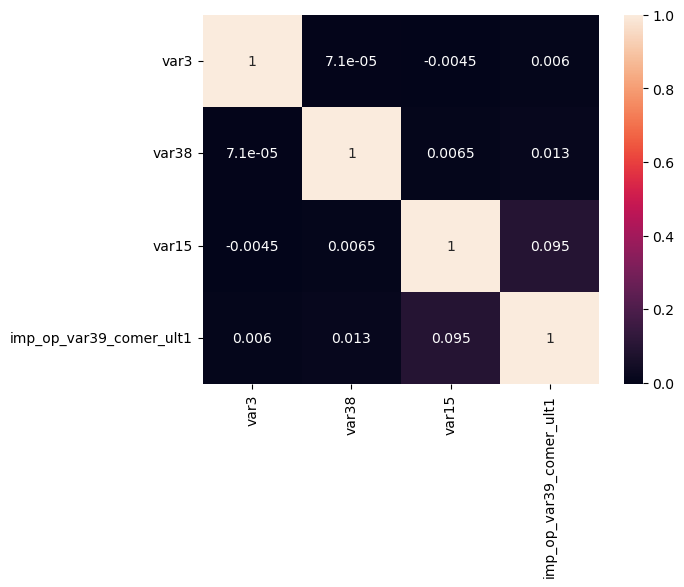

In [7]:
df_train = pd.read_csv('train.csv')
corr_column = ["var3", "var38", "var15", "imp_op_var39_comer_ult1"]
corr = sns.heatmap(df_train[corr_column].corr(), annot=True)
plt.show()

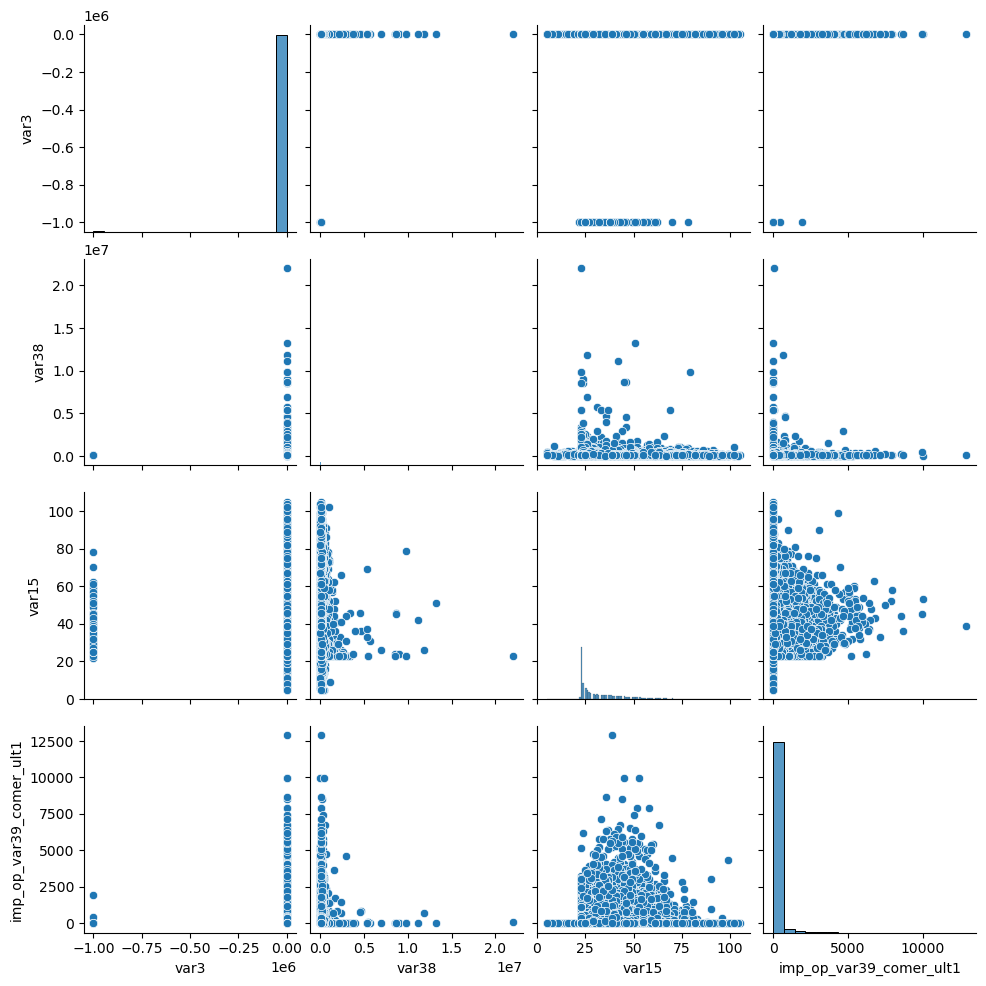

In [73]:
sns.pairplot(df_train[["var3", "var38", "var15", "imp_op_var39_comer_ult1"]])

the above scatter plots shows that there is no visible linear relationship among the data

In [9]:
#checking for missing records

df_train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

no missing values so there is no need for imputation

In [12]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


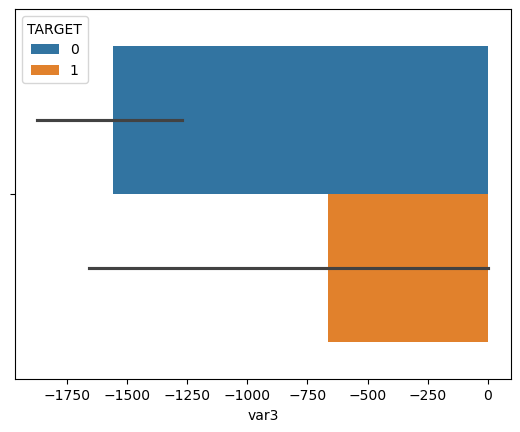

In [20]:
#exploring var3 wrt target
sns.barplot(df_train, x='var3', hue='TARGET')
plt.show()

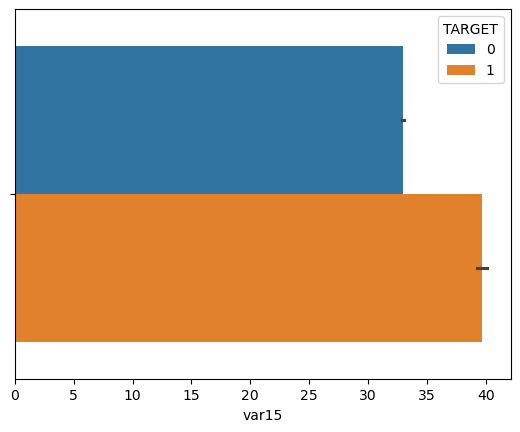

In [22]:
sns.barplot(df_train, x='var15', hue='TARGET')
plt.show()

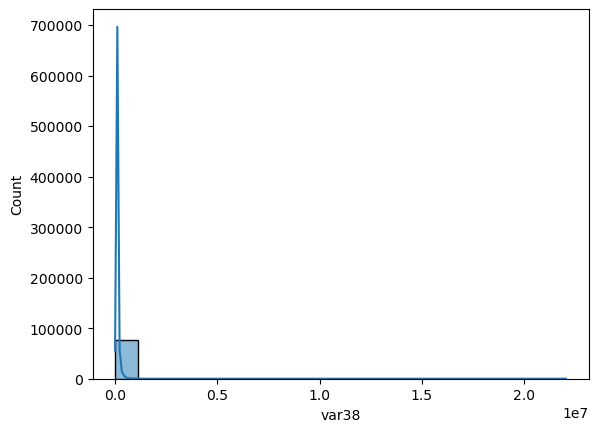

In [42]:
sns.histplot(df_train['var38'], bins=20, kde=True)
plt.show()

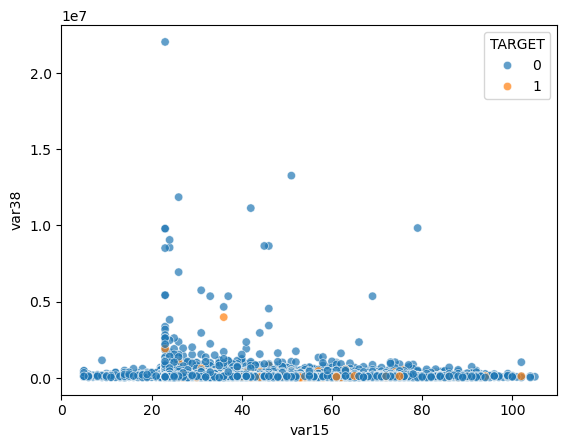

In [56]:
sns.scatterplot(data=df_train, x='var15', y='var38', hue='TARGET', alpha=0.7)
plt.show()

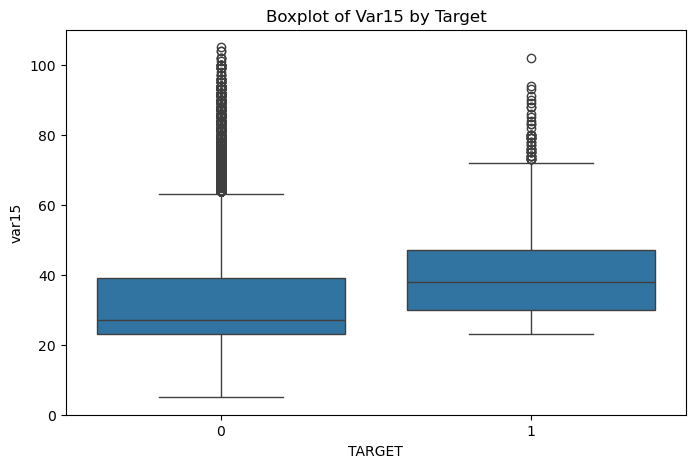

In [54]:

sns.boxplot(x="TARGET", y="var15", data=df_train)
plt.title("Boxplot of Var15 by Target")
plt.show()

In [62]:
print(df_train['TARGET'].unique())
print(df_train['TARGET'].value_counts())

[0 1]
TARGET
0    73012
1     3008
Name: count, dtype: int64


dataset is imbalanced.

In [79]:
#up sampling to make the dataset balanced
df_majority = df_train[df_train.TARGET == 0]
df_minority = df_train[df_train.TARGET == 1]

#upsampling minority
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_train = pd.concat([df_majority, df_minority_upsampled])

print(df_train['TARGET'].value_counts())

TARGET
0    73012
1    73012
Name: count, dtype: int64


In [83]:
#if two features are highly correlated then they almost carry the same information. Keeping both adds redundancy

corr_matrix = df_train.corr()
threshold = 0.65
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any (upper_triangle[column].abs() > threshold)]
print("Highly correlated features to drop:", to_drop)
# Step 4: Drop them
df_train_reduced = df_train.drop(columns=to_drop)
print("\n\nShape after Pearson feature selection:", df_train_reduced.shape)


Highly correlated features to drop: ['imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13_medio', 'ind_var13', 'ind_var17', 'ind_var18', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_0', 'ind_var32', 'ind_var33', 'ind_var34', 'ind_var37_0', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_0', 'num_v

In [99]:
df_copy = df_train.copy()
X = df_copy.drop("TARGET", axis=1)  # independent features
y = df_copy["TARGET"]              # target feature

selector = SelectKBest(k=7)  # pick top 10 features
X_kbest = selector.fit_transform(X, y)

print("Selected Features:", X.columns[selector.get_support()])

C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features: Index(['var15', 'ind_var5', 'ind_var30', 'num_var5', 'num_var30', 'num_var42',
       'num_meses_var5_ult3'],
      dtype='object')
